In [4]:
import cv2
import os
import numpy as np
import random
demand_dim=2

m=1
img = cv2.imread("shirokuro3.png",cv2.IMREAD_COLOR)
#print(img[150, 30])
#print(len(img))
#print(len(img[1]))

C={}
demand={}
c_counter=0
#写真の座標を見て、黒だったら顧客リストに座標追加
for i in range(len(img)):
    for j in range(len(img[0])):
        r=random.randint(0,50) #1/200の確率で顧客ノード追加
        if r==0:
            if list(img[i,j]) == [0,0,0]:
                C["c"+str(c_counter)] = (i,j)
                demand["c"+str(c_counter)]=1
                c_counter += 1
#C["depot"]=int(len(img)/2),int(len(img[0])/2)
C["depot"] = C["c"+str(len(C)-1)]
print("顧客数",len(C))


顧客数 5125


In [5]:
C

{'c0': (17, 400),
 'c1': (18, 474),
 'c2': (21, 419),
 'c3': (21, 423),
 'c4': (22, 402),
 'c5': (22, 416),
 'c6': (22, 421),
 'c7': (22, 479),
 'c8': (24, 415),
 'c9': (24, 418),
 'c10': (24, 460),
 'c11': (25, 406),
 'c12': (25, 447),
 'c13': (26, 396),
 'c14': (27, 408),
 'c15': (27, 445),
 'c16': (27, 448),
 'c17': (28, 416),
 'c18': (29, 430),
 'c19': (29, 469),
 'c20': (30, 361),
 'c21': (30, 421),
 'c22': (30, 476),
 'c23': (31, 395),
 'c24': (31, 452),
 'c25': (32, 405),
 'c26': (32, 456),
 'c27': (32, 459),
 'c28': (32, 464),
 'c29': (32, 476),
 'c30': (32, 478),
 'c31': (32, 488),
 'c32': (33, 364),
 'c33': (33, 385),
 'c34': (33, 412),
 'c35': (33, 434),
 'c36': (33, 448),
 'c37': (33, 469),
 'c38': (33, 501),
 'c39': (34, 386),
 'c40': (34, 456),
 'c41': (35, 377),
 'c42': (35, 450),
 'c43': (35, 457),
 'c44': (36, 405),
 'c45': (36, 497),
 'c46': (37, 424),
 'c47': (38, 367),
 'c48': (38, 370),
 'c49': (38, 428),
 'c50': (38, 460),
 'c51': (39, 367),
 'c52': (39, 400),
 'c

In [6]:
def distance(t1,t2):
    return ((t1[0]-t2[0])**2+(t1[1]-t2[1])**2)**(0.5)

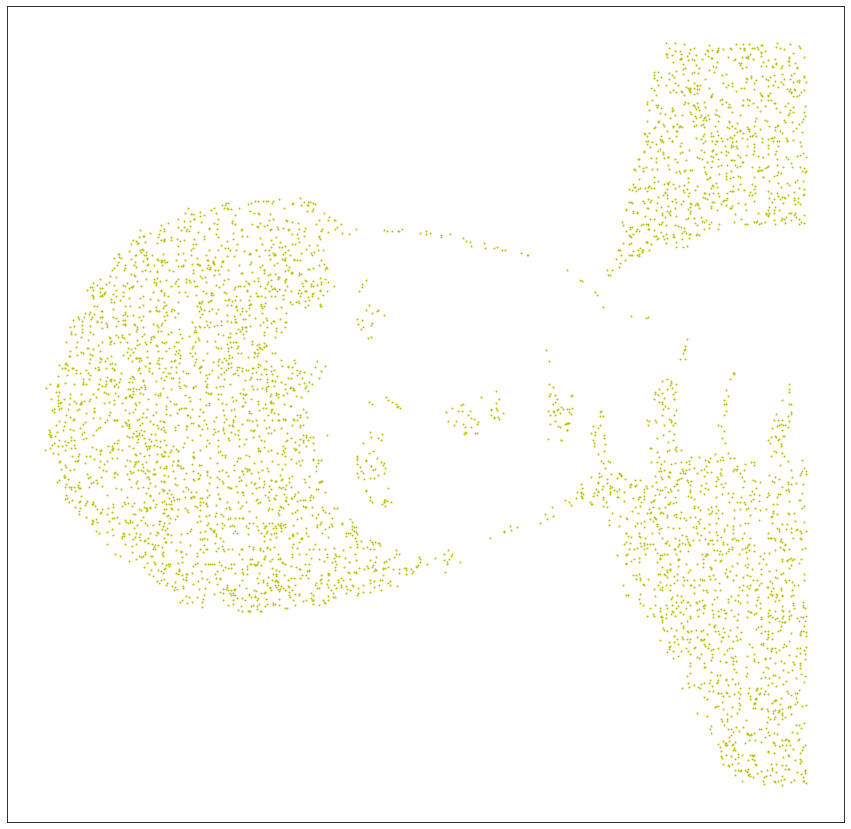

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,15))

G=nx.DiGraph()
nx.draw_networkx(G,pos=C,nodelist=[i for i in C if i != "depot"],node_color="y",node_size=1,with_labels=True,edge_color="k",width=1)

plt.show()

In [12]:
x_list=[]
y_list=[]
for i in C:
    x_list.append(C[i][0])
    y_list.append(C[i][1])
big_m=max(x_list)-min(x_list)+max(y_list)-min(y_list)
big_m*=2
big_m

3506

## TSP NN

In [13]:
import time
start = time.time()
opt_val=0

not_done=[i for i in C]
now="c0"
not_done.remove("c0")
tsp_list=[now]


while len(not_done)>0:
    dis=big_m
    
    for i in not_done:
       
        if distance(C[now],C[i])<dis:
            dis = distance(C[now],C[i])
            next_node = i
    opt_val += distance(C[now],C[next_node])
    
    not_done.remove(next_node)
    now=next_node
    tsp_list.append(next_node)

tsp_list.append("c0")
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:15.321665048599243[sec]


In [14]:
opt_val

34680.89513200898

In [15]:
import networkx as nx

G = nx.Graph()
for i in C:
    G.add_node(i)
edge_list=[]
for i in range(len(tsp_list)-1):
    edge_list.append((tsp_list[i],tsp_list[i+1]))
G.add_edges_from(edge_list)

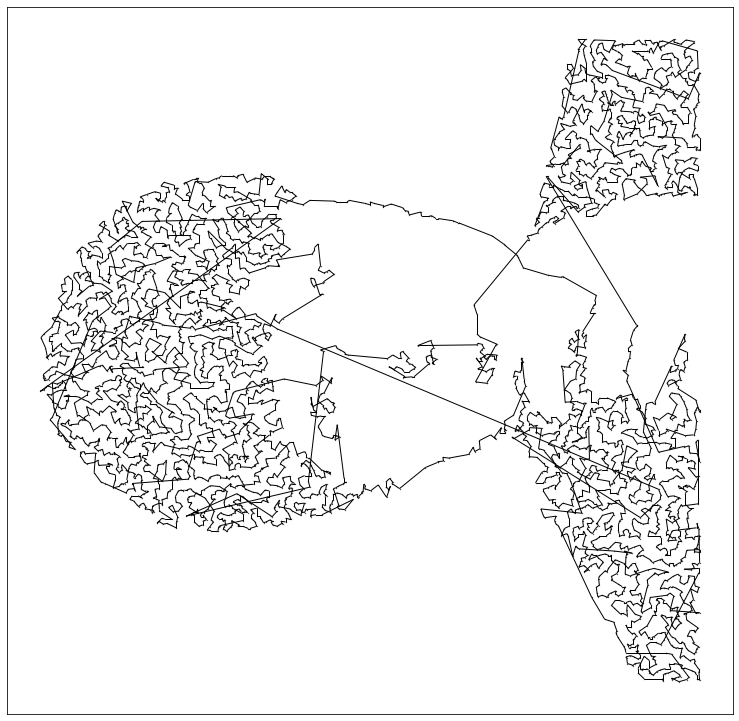

In [16]:
fig=plt.figure(figsize=(13,13 ))
nx.draw_networkx(G,pos=C,nodelist=C,node_color='black',node_size=0.1,with_labels=False,edge_color="k",width=1)
plt.show()

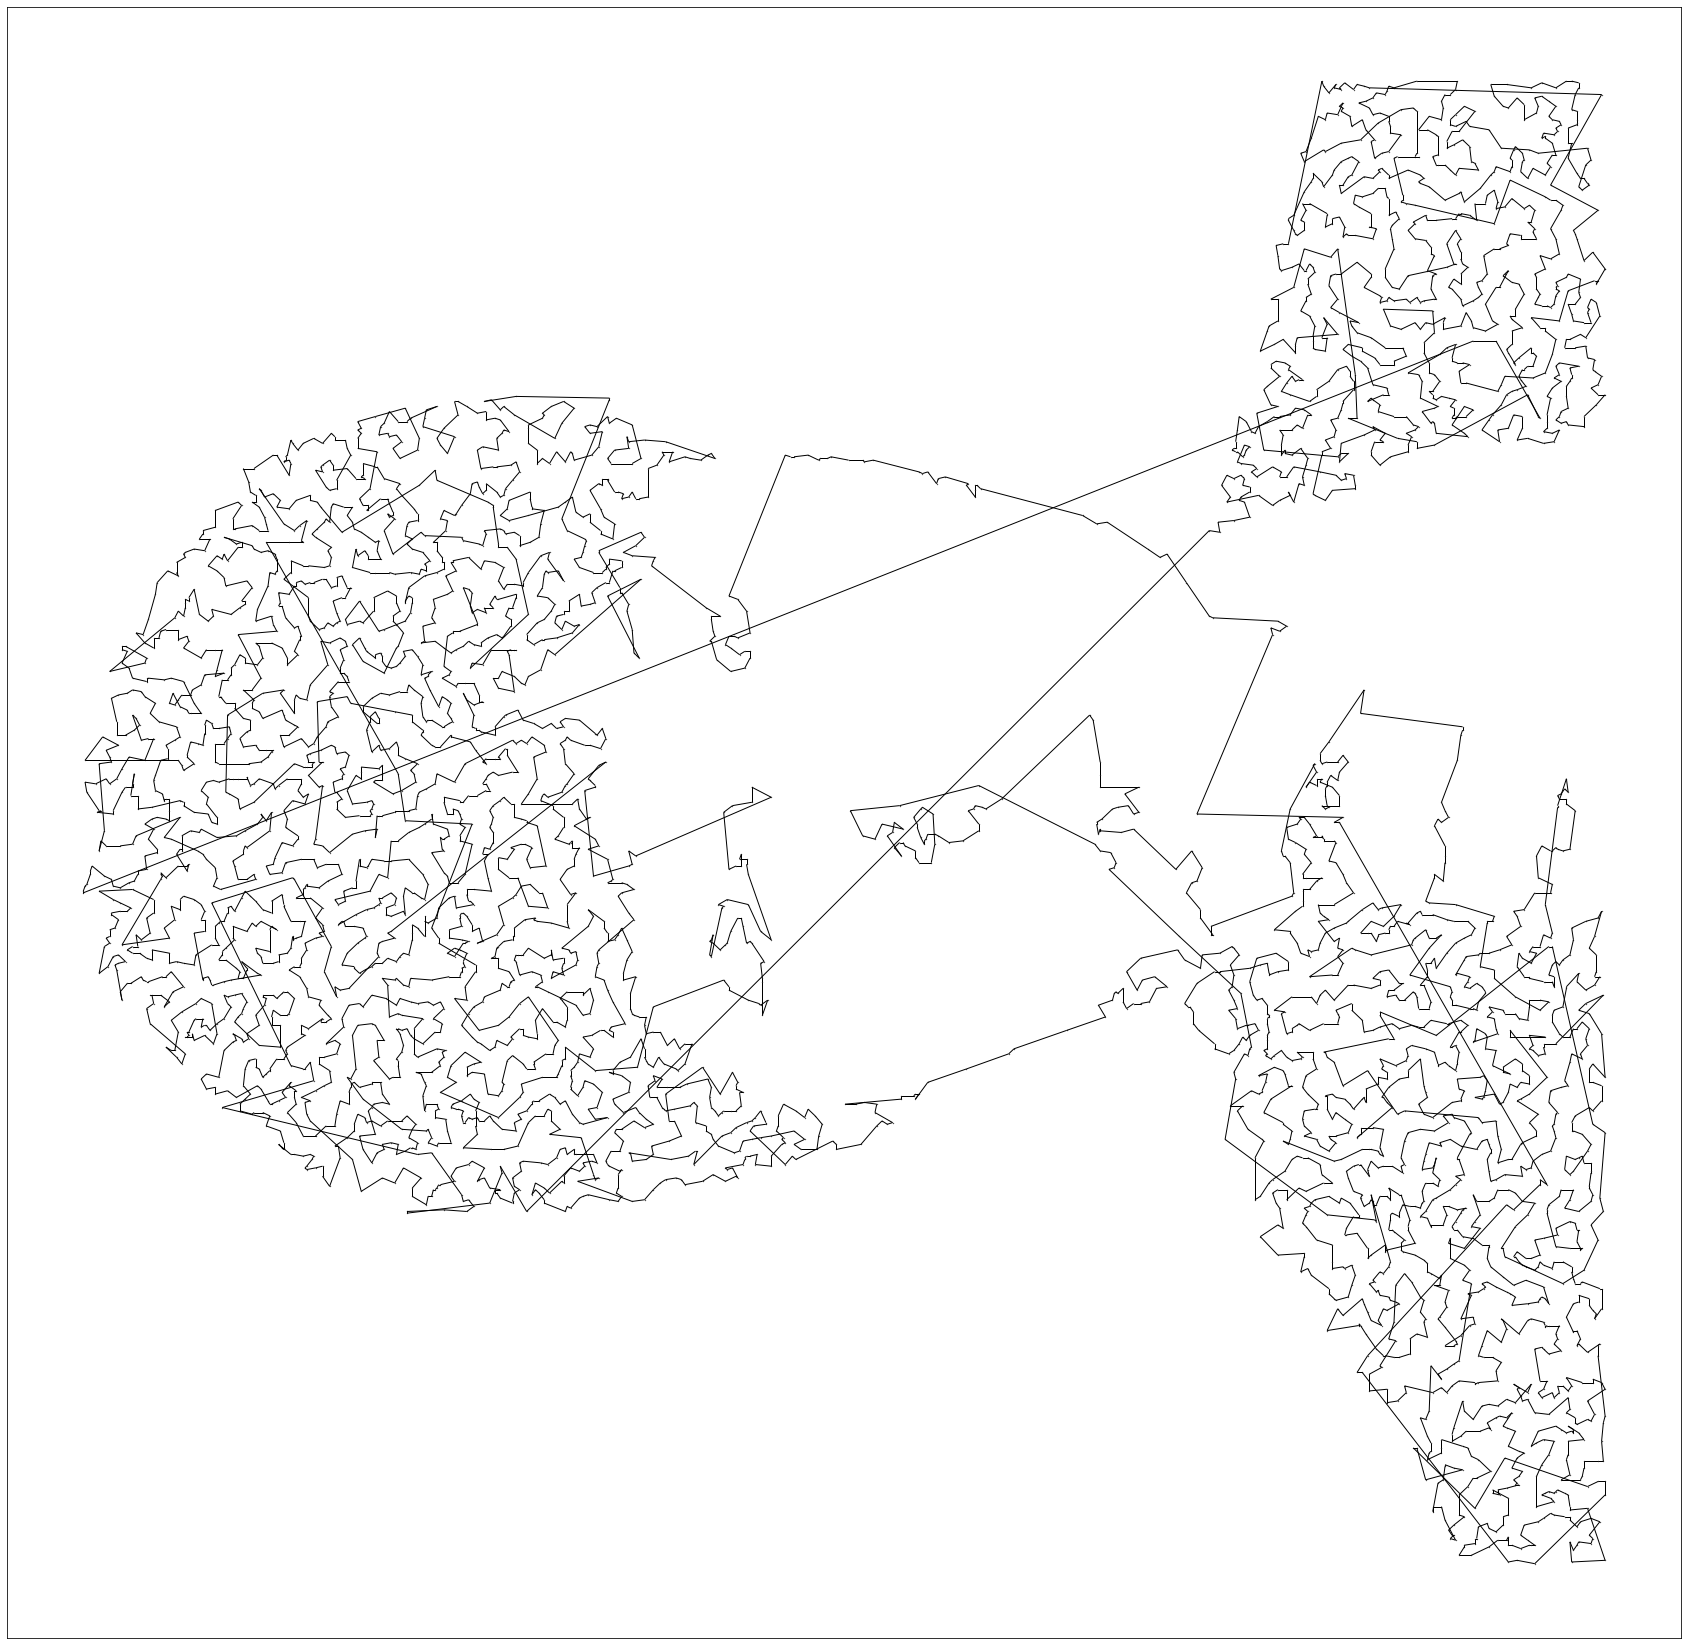

In [182]:
fig=plt.figure(figsize=(30,30 ))
nx.draw_networkx(G,pos=C,nodelist=C,node_color='black',node_size=0.1,with_labels=False,edge_color="k",width=1)
plt.show()